# Embeddings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate Data

In [2]:
N = 10_000
n_tokens = 5

x = np.random.choice(n_tokens, N)
x[:10]

array([3, 3, 3, 4, 4, 0, 2, 4, 0, 2])

In [3]:
token_effect = np.linspace(start=-20, stop=20, num=5)
token_effect = np.random.choice(token_effect, n_tokens, replace=False)
token_effect

array([-10., -20.,   0.,  10.,  20.])

In [4]:
y = np.random.normal(token_effect[x], scale=2, size=N)
y[:10]

array([ 10.61043062,   8.73680147,  11.63851556,  25.53431543,
        19.4756197 , -10.21069965,   0.1765265 ,  17.87634651,
        -7.97485266,  -1.66333528])

# Embedding Model

Create embedding model.

In [5]:
model = keras.models.Sequential()
model.add(layers.Embedding(input_dim = n_tokens, output_dim = 6, input_length=1))
model.add(layers.Dense(units=10, activation='linear'))
model.add(layers.Dense(units=8, activation='linear'))
model.add(layers.Dense(units=6, activation='linear'))
model.add(layers.Dense(units=4, activation='linear'))
model.add(layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 6)              30        
_________________________________________________________________
dense (Dense)                (None, 1, 10)             70        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 8)              88        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 6)              54        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 4)              28        
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)              5         
Total params: 275
Trainable params: 275
Non-trainable params: 0
__________________________________________________________

In [6]:
model.compile(optimizer='rmsprop', loss='mse', metrics='acc')

Train model.

In [7]:
history = model.fit(x=x, y=y, epochs=100, batch_size=1_000, validation_split=0, verbose=0)

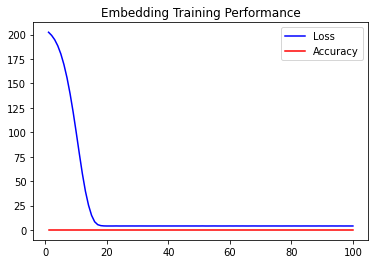

In [8]:
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, acc, 'r', label='Accuracy')
plt.title('Embedding Training Performance')
plt.legend()
plt.show()

Extract embedding layer.

In [9]:
weights = model.get_weights()
embedding = weights[0]
embedding.shape

(5, 6)

In [10]:
np.round(embedding,2)

array([[-0.1 , -0.1 ,  0.08, -0.15,  0.11,  0.11],
       [-0.19, -0.2 ,  0.24, -0.23,  0.2 ,  0.23],
       [-0.04,  0.01, -0.02,  0.01, -0.02,  0.06],
       [ 0.12,  0.12, -0.12,  0.06, -0.11, -0.09],
       [ 0.21,  0.23, -0.17,  0.19, -0.21, -0.21]], dtype=float32)

In [11]:
embedding[0,]

array([-0.09708724, -0.1005454 ,  0.07603904, -0.15420276,  0.11491995,
        0.10821885], dtype=float32)

In [12]:
def similarities(target_index, embedding_matrix):
    result = []
    for i in range(0,embedding_matrix.shape[0]):
        s = np.linalg.norm(embedding_matrix[target_index,] - embedding_matrix[i,])
        result.append(s)
    return(np.array(result))

The embedding similiarity maps the token effect. The similarity score will be closer to 0 (i.e. similar) for a pair of embeddings if their token effect is close to one another. For example, we expect the embedding for the token that maps to a token effect value of 20 to be farther away from the embedding for the token that maps to a token effect value of -20.

In [13]:
token_effect

array([-10., -20.,   0.,  10.,  20.])

In [14]:
similarities(0, embedding)

array([0.       , 0.2710784, 0.2682705, 0.5218097, 0.7749771],
      dtype=float32)

# Predictive Check

Below we perform a predictive check. We confirm that the prediction

In [15]:
pred = model.predict(x=x)

In [16]:
cols = np.array(['#005073','#107dac','#189ad3','#1ebbd7','#71c7ec'])
x_range = range(0,len(y))

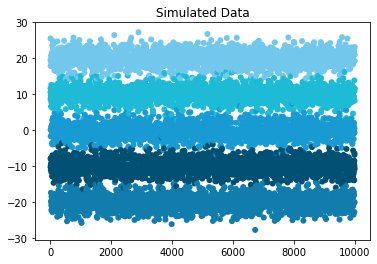

In [17]:
plt.scatter(x_range, y, color=cols[x], edgecolor='none')
plt.title('Simulated Data')
plt.show()

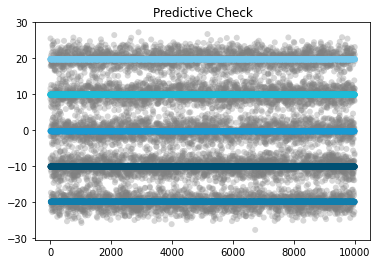

In [18]:
plt.scatter(x_range, y, color='#80808050', edgecolor='none')
plt.scatter(x_range, pred, color=cols[x], edgecolor='none')
plt.title('Predictive Check')
plt.show()